# This is a the All Sky Simulation for MWM 100pc Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

## New in Gamma-0
- Updated bright candance, so that lunation was also 1.0 for BOSS

In [2]:
ver='gamma-0'
bright_tab = Table.read('workspace/target_files/100pc/{}/mwm_100pc_bright_2x1.csv'.format(ver))
dim_tab = Table.read('workspace/target_files/100pc/{}/mwm_100pc_faint_1x1.csv'.format(ver))
bright_tab

ra,dec
float64,float64
201.9014167374864,12.979473795503603
84.59621604551333,18.40982051964632
256.80513208607783,3.7553510054879826
285.8905929332517,-4.413819496041949
259.9004130942771,-34.75982735699336
139.4097396712289,-19.187466258930055
241.24365031844903,8.771668279855815
289.96911476160363,-14.228679332708145
165.3703162381208,-37.740891594308984


/home/deleenm/Dropbox/Research/notebooks/SDSS-V SimTargets/allsky/targetlib.py:206: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap = Basemap(projection='moll', lon_0=185,lat_0=0)
/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


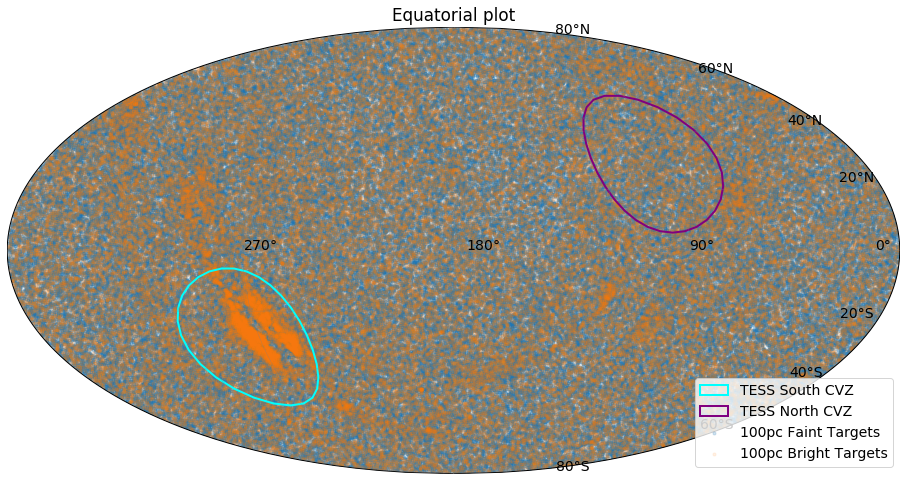

In [3]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_gal()
#Plot WD Targets
xdim,ydim = bmap(dim_tab['ra'],dim_tab['dec'])
bmap.scatter(xdim,ydim,marker='.',label='100pc Faint Targets',alpha=0.2)
xbright,ybright = bmap(bright_tab['ra'],bright_tab['dec'])
bmap.scatter(xbright,ybright,marker='.',label='100pc Bright Targets',alpha=0.1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Create Target Table

In [4]:
target_tab = Table()

## Combine target tables together

In [5]:
num_targets = len(bright_tab)+len(dim_tab)
target_tab['ra'] = np.concatenate([dim_tab['ra'],bright_tab['ra']])
target_tab['dec'] = np.concatenate([dim_tab['dec'],bright_tab['dec']])
cadence_arr = np.concatenate([np.repeat('mwm_100pc_faint_1x1',len(dim_tab)),
                              np.repeat('mwm_100pc_bright_2x1',len(bright_tab))])
target_tab['cadence'] = cadence_arr
target_tab['type'] = np.repeat('mwm_100pc',num_targets)
target_tab['priority'] = np.repeat(np.array(35,dtype='int32'),num_targets)
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),num_targets)

In [6]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str20,str9,int32,float32
356.3458481843713,-8.282509358624447,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
143.06205781759004,52.90885266949462,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
340.4976010277588,41.071919731520374,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
142.47745755360683,-81.07119835588043,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
245.5174676696194,-4.678790885180176,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
1.7340417638573522,23.470443771491496,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
143.71657239775104,-17.26615602876427,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
275.20066039272325,-19.55795525370691,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
115.55557456326375,31.950811156173337,mwm_100pc_faint_1x1,mwm_100pc,35,1.0


In [7]:
target_tab.write('{}/mwm_100pc_target_{}.fits'.format(ver,ver),overwrite=True)

## Create Cadence Table

In [8]:
cadence_tab = Table()

In [9]:
cadence_tab['cadence'] = np.array(['mwm_100pc_faint_1x1','mwm_100pc_bright_2x1'])
cadence_tab['nepochs'] = np.array([1,2],dtype='int32')
cadence_tab['delta'] = np.array([[0,np.nan],[0,180]],dtype='float32')
cadence_tab['delta_min'] = np.array([[0,np.nan],[0,1]],dtype='float32')
cadence_tab['delta_max'] = np.array([[0,np.nan],[0,3000]],dtype='float32')
cadence_tab['lunation'] = np.array([[0.35,np.nan],[1.0,1.0]],dtype='float32')
cadence_tab['instrument'] = np.array([['boss',np.nan],['boss','apogee']])

In [10]:
cadence_tab

cadence,nepochs,delta [2],delta_min [2],delta_max [2],lunation [2],instrument [2]
str20,int32,float32,float32,float32,float32,str6
mwm_100pc_faint_1x1,1,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.35 .. nan,boss .. nan
mwm_100pc_bright_2x1,2,0.0 .. 180.0,0.0 .. 1.0,0.0 .. 3000.0,1.0 .. 1.0,boss .. apogee


In [11]:
cadence_tab.write('{}/mwm_100pc_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [12]:
test =  Table.read('{}/mwm_100pc_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta [2],delta_min [2],delta_max [2],lunation [2],instrument [2]
bytes20,int32,float32,float32,float32,float32,bytes24
mwm_100pc_faint_1x1,1,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.35 .. nan,boss .. nan
mwm_100pc_bright_2x1,2,0.0 .. 180.0,0.0 .. 1.0,0.0 .. 3000.0,1.0 .. 1.0,boss .. apogee
